# **BT thực hành 6.2: Descriptive Statistics - Count Cars**


> Cập nhật: **07/2023**



Tập tin **count_cars.txt** lưu trữ dữ liệu đếm số lượng ô tô đi qua tại một điểm trong 100 khoảng thời gian (cách nhau 20 phút).
1. Tạo cars_array từ nội dung tập tin
2. Vẽ biểu đồ phân phối tần suất của cars_array
3. Thống kê cơ bản cho cars_array; mean, median, mode (gồm những giá trị nào? số lần là bao nhiêu?), max, min
4. Tìm range
5. Cho biết giá trị ở bách phân vị thứ [5, 15, 25, 50, 75, 90] của cars_array. Biểu diễn phân vị và giá trị tương ứng trên biểu đồ.
6. Vẽ boxplot của cars_array. Dùng z-score để xác định outliers (những index nào? giá trị outliers tương ứng cho những index đó?)
7. Tìm IQR cho car_arrays
8. Tìm phương sai (variance) cùa cars_array
9. Tìm độ lệch chuẩn Standard deviation của cars_array
10. Tìm độ xiên (Skewness) của cars_array. Nhận xét kết quả.
11. Tìm độ nhọn Kurtosis của cars_array. Nhận xét kết quả.

In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = ''

Mounted at /content/gdrive


In [1]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

from numpy               import mean, median
from scipy               import stats

In [2]:
## Đọc tập tin dữ liệu
f = open('Data/count_cars.txt', 'r')

## Nội dung tập tin (100 giá trị: số lượng xe đếm được trong 100 khoảng thời gian)
content = f.read()
print(content)

23 20 16 18 30 22 26 15 5 18
14 17 11 37 21 6 10 20 22 25
19 19 19 20 12 23 24 17 18 16
27 16 28 26 15 29 19 35 20 17
12 30 21 22 20 15 18 16 23 24
15 24 28 19 24 22 17 19 8 18
17 18 23 21 25 19 20 22 21 21
16 20 19 11 23 17 23 13 17 26
26 14 15 16 27 18 21 24 33 20
21 27 18 22 17 20 14 21 22 19


In [7]:
## 1. Tạo cars_array từ nội dung tập tin
cars = content.split() # hàm split() rút trích các terms trong chuỗi
f.close()

cars = list(map(int, cars))  # chuyển sang list()
cars_array = np.array(cars)
cars_array

array([23, 20, 16, 18, 30, 22, 26, 15,  5, 18, 14, 17, 11, 37, 21,  6, 10,
       20, 22, 25, 19, 19, 19, 20, 12, 23, 24, 17, 18, 16, 27, 16, 28, 26,
       15, 29, 19, 35, 20, 17, 12, 30, 21, 22, 20, 15, 18, 16, 23, 24, 15,
       24, 28, 19, 24, 22, 17, 19,  8, 18, 17, 18, 23, 21, 25, 19, 20, 22,
       21, 21, 16, 20, 19, 11, 23, 17, 23, 13, 17, 26, 26, 14, 15, 16, 27,
       18, 21, 24, 33, 20, 21, 27, 18, 22, 17, 20, 14, 21, 22, 19])

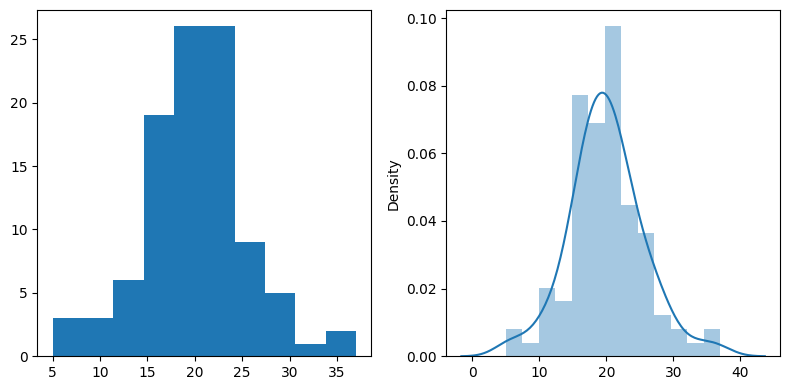

In [8]:
## 2. Vẽ biểu đồ phân phối tần suất của cars_array
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.hist(cars_array)
plt.subplot(1, 2, 2)
sns.distplot(cars_array)
plt.tight_layout()
plt.show()

In [17]:
## 3. Thống kê cơ bản trên dữ liệu
# print('Mean   x_    =', mean(cars_array))
# print('MIN    x_min =', min(cars_array))
# print('MAX    x_max =', max(cars_array))
# print('Median x_med =', median(cars_array))
x_mod = stats.mode(cars_array)
print(x_mod)
print('Mode   x_mod =', x_mod[0])
# print('       f(x)  =', x_mod[1][0]) # số lần

ModeResult(mode=19, count=9)


IndexError: invalid index to scalar variable.

In [4]:
## 4. Tìm range
range_cars = np.ptp(cars_array)
range_cars

32

In [10]:
## 5. Các giá trị bách phân vị
percentiles = np.array([5, 15, 25, 50, 75, 90])  # trục tung
x = np.percentile(cars_array, percentiles)       # trục hoành
x

array([11., 15., 17., 20., 23., 27.])

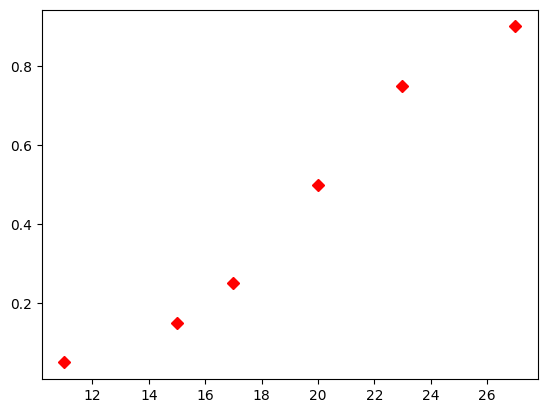

In [ ]:
## Vẽ biểu đồ
plt.plot(x, percentiles/100, marker = 'D', color = 'red', linestyle = 'none')
plt.show()

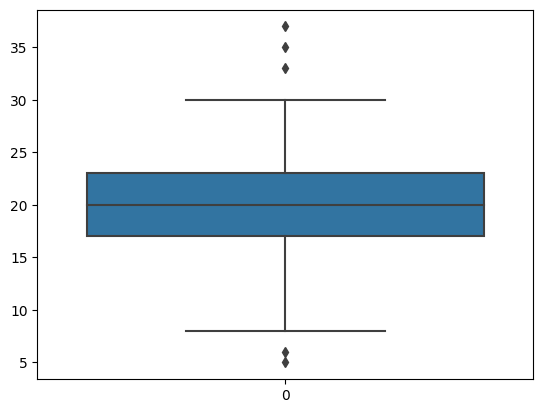

In [ ]:
## 6. Vẽ boxplot của cars_array
sns.boxplot(cars_array)

In [ ]:
## Dùng z-score để xác định outliers
sigma = 3

cars_z_score = stats.zscore(cars_array)  # chuyển x[i] sang z[i]
outliers     = cars_z_score[[(n < (sigma * -1))|(n > sigma) for n in cars_z_score]]
indexes      = [cars_z_score.tolist().index(i) for i in outliers]
print("Chỉ số của outliers:",indexes)
print("Giá trị outliers   :", cars_array[indexes])

Chỉ số của outliers: [13]
Giá trị outliers   : [37]


In [ ]:
## 7. Tính IQR
IQR = stats.iqr(cars_array)
IQR

6.0

In [ ]:
## 8. Tính phương sai (variance)
var_cars = np.var(cars_array) # ddof = 1
var_cars

30.489099999999993

In [ ]:
## 9. Tính độ lệch chuẩn (standard deviation)
std_cars = np.std(cars_array) # ddof = 1
std_cars

5.52169358077755

In [ ]:
# 10. Tính độ xiên (skewness) bằng hàm của Python. Nhận xét kết quả.
skew_cars = stats.skew(cars_array)
print(f'Độ nghiêng (hàm Python) = {skew_cars:.4f}')

print('Mẫu dữ liệu lệch PHẢI') if (skew_cars > 0) else print('Mẫu dữ liệu lệch TRÁI')

Độ nghiêng (hàm Python) = 0.2129
Mẫu dữ liệu lệch PHẢI


In [ ]:
## So sánh giữa MEAN và MEDIAN
print('Mẫu dữ liệu lệch PHẢI') if (mean(cars_array) > median(cars_array)) else print('Mẫu dữ liệu lệch TRÁI')

Mẫu dữ liệu lệch TRÁI


Nhận xét về sự mâu thuẫn trong độ lệch:
- Kết luận về độ lệch TRÁI hay PHẢI dựa trên vị trí tương đối giữa Mean và Median chỉ đúng phân phối **CHỈ CÓ 1 Mode**.
- Mẫu dữ liệu 'cars_array' có **2 Modes** là 19 và 20 với frequency = 9



In [ ]:
## Danh sách mode(s)
df = pd.DataFrame(cars_array, columns = ['cnt'])
df = (df.groupby(['cnt']).cnt.count().sort_values(ascending = False))
print(df[df == df.max()])

## Python 3.8
from statistics import multimode
print(multimode(cars_array))

cnt
20    9
19    9
Name: cnt, dtype: int64
[20, 19]


In [ ]:
## 11. Tính độ nhọn (kurtosis). Nhận xét kết quả.
kur_cars = stats.kurtosis(cars_array) # fisher = True (default): kur - 3 (excess-kur)
kur_cars

0.9396339028047

In [ ]:
kur_cars = stats.kurtosis(cars_array, fisher = False)
kur_cars

3.9396339028047